In [ ]:
!wget https://statso.io/wp-content/uploads/2022/12/Myntra-Kurtis.zip

--2023-04-11 17:08:01--  https://statso.io/wp-content/uploads/2022/12/Myntra-Kurtis.zip
Resolving statso.io (statso.io)... 192.0.78.24, 192.0.78.25
Connecting to statso.io (statso.io)|192.0.78.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26815 (26K) [application/zip]
Saving to: ‘Myntra-Kurtis.zip’

Myntra-Kurtis.zip   100%[===================>]  26.19K  --.-KB/s    in 0.001s  

2023-04-11 17:08:01 (30.5 MB/s) - ‘Myntra-Kurtis.zip’ saved [26815/26815]



In [ ]:
!unzip /content/Myntra-Kurtis.zip

Archive:  /content/Myntra-Kurtis.zip
   creating: Myntra Kurtis/
  inflating: Myntra Kurtis/.DS_Store  
  inflating: __MACOSX/Myntra Kurtis/._.DS_Store  
  inflating: Myntra Kurtis/Myntra kurtis.csv  
  inflating: __MACOSX/Myntra Kurtis/._Myntra kurtis.csv  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import string

data = pd.read_csv("/content/Myntra Kurtis/Myntra kurtis.csv")

In [ ]:
data.shape

(599, 9)

In [ ]:
data.head(3)

,Brand Name,Product URL,Image,Product Ratings,Number of ratings,Product Info,Selling Price,Price,Discount
0,Rain & Rainbow,https://www.myntra.com/kurtis/rain--rainbow/ra...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,28,Printed Pure Cotton Kurti,837.0,1395.0,(40% OFF)
1,HERE&NOW,https://www.myntra.com/kurtis/herenow/herenow-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,805,Embroidered Pure Cotton A-Line Kurti,719.0,1799.0,(60% OFF)
2,Anouk,https://www.myntra.com/kurtis/anouk/anouk-wome...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",4.2,2800,Printed Pure Cotton Indigo Anarkali Kurta,594.0,1699.0,(65% OFF)


In [ ]:
data.isnull().sum()

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64

In [ ]:
data = data.drop("Image",axis=1)

data = data.dropna()

data.shape

(364, 8)

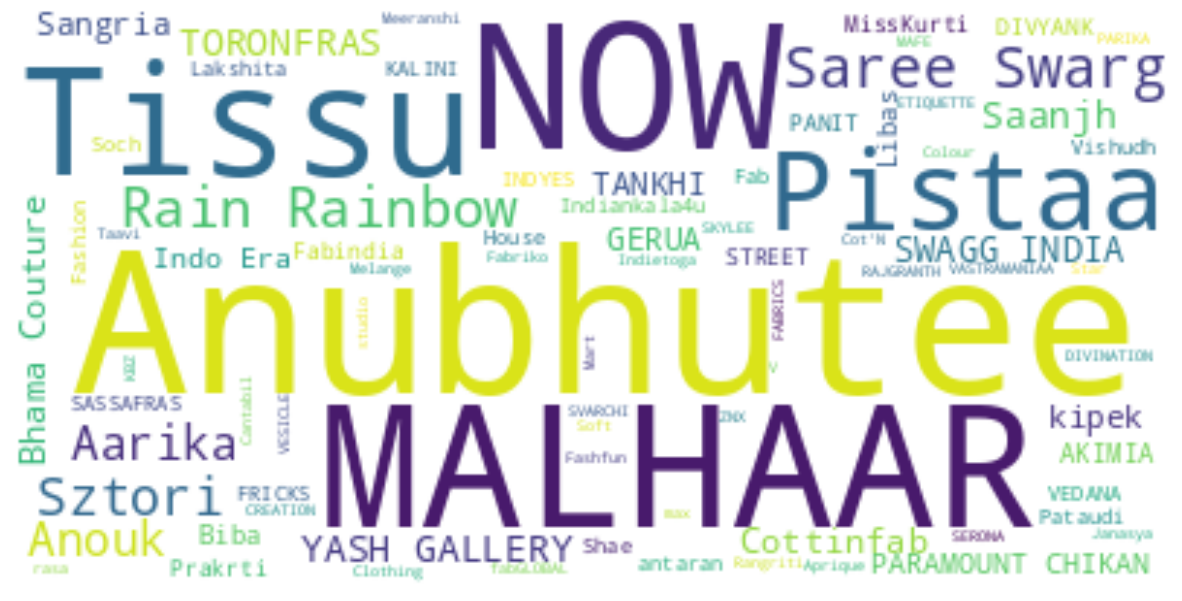

In [ ]:
text = " ".join(i for i in data["Brand Name"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
highest_rated = data.sort_values(by=["Product Ratings"], 
                                 ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated[['Product Info', "Product Ratings", "Brand Name"]])

                        Product Info  Product Ratings        Brand Name
435            Mandarin Collar Kurti              5.0            INDYES
249      Floral Printed Kaftan Kurta              5.0           Sangria
448          Solid Pure Cotton Kurti              5.0           MALHAAR
308             Floral Printed Kurti              5.0           MALHAAR
538                Pure Cotton Kurti              5.0           MALHAAR
277    Women Solid Embellished Kurti              5.0          Fabindia
515     Chikankari Embroidered Kurti              5.0  PARAMOUNT CHIKAN
62       Ethnic Motifs Printed Kurti              4.9              Biba
80   Ethnic Motifs Embroidered Kurti              4.8           Sangria
450      Self Striped Straight Kurti              4.8            Saanjh


In [ ]:
mr = data['Product Ratings'].mean()
m = data['Number of ratings'].quantile(0.9)
n = data['Number of ratings']
a = data['Product Ratings']
data["Score"]  = (n/(n+m) * a) + (m/(m+n) * mr)

recommendations = data.sort_values('Score', ascending=False)


In [ ]:
recommendations[['Brand Name', 'Product Info',
                       'Product Ratings', 'Score', 
                       'Selling Price', 'Discount']].head(10)

,Brand Name,Product Info,Product Ratings,Score,Selling Price,Discount
48,Tissu,Women Floral Print A-Line Kurti,4.4,4.338320,549.0,(45% OFF)
11,Anubhutee,Ethnic Motifs Printed Kurti,4.4,4.300868,521.0,(70% OFF)
155,Anubhutee,Women Printed Kurti,4.4,4.296895,486.0,(72% OFF)
66,YASH GALLERY,Printed A-Line Kurti,4.5,4.295568,629.0,(55% OFF)
27,Anubhutee,Women Printed Straight Kurti,4.3,4.274815,521.0,(70% OFF)
102,AKIMIA,Embroidered Pure Cotton Kurti,4.5,4.273667,767.0,(52% OFF)
88,Tissu,Women Floral Printed Straight Kurti,4.3,4.267992,548.0,(39% OFF)
3,Anubhutee,Ethnic Motifs Printed Kurti,4.3,4.267992,521.0,(70% OFF)
42,Rain & Rainbow,Women Printed Pure Cotton Pure Cotton A-Line K...,4.4,4.264685,797.0,(50% OFF)
18,GERUA,Ethnic Motifs Printed Kurti,4.6,4.262359,449.0,(70% OFF)
